<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-5-Guage-ChatGPT-PromptCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

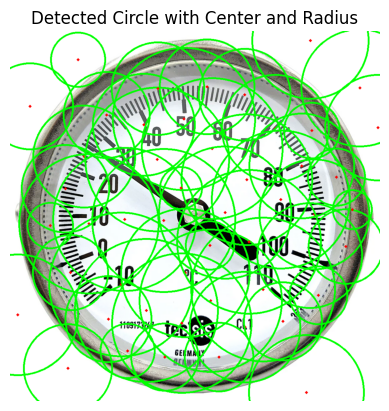

{'center': (473, 434), 'radius': 58}

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './gauge--10-110_1200x.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve circle detection
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=100,
    param1=50,
    param2=30,
    minRadius=50,
    maxRadius=200
)

# If circles are detected, proceed to draw them
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # Draw the outer circle
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)
        # Draw the center of the circle
        cv2.circle(image, (x, y), 2, (0, 0, 255), 3)

    # Show the image with detected circles
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Circle with Center and Radius")
    plt.axis("off")
    plt.show()

    # Output circle data
    circle_data = {"center": (x, y), "radius": r}
else:
    circle_data = "No circles detected."

circle_data


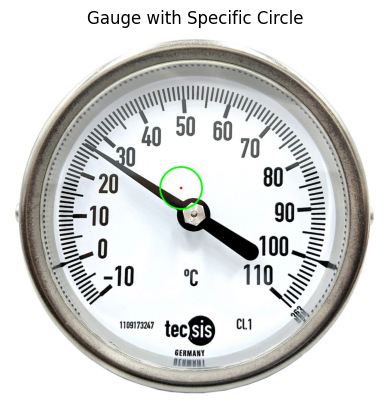

'/mnt/data/gauge_with_circle.png'

In [2]:
# Draw the specific circle (center (473, 434), radius 58) on the image

# Reload the original image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Define center and radius
center = (473, 434)
radius = 58

# Draw the outer circle
cv2.circle(image, center, radius, (0, 255, 0), 4)
# Draw the center of the circle
cv2.circle(image, center, 2, (0, 0, 255), 3)

# Save the modified image to a file
output_path = '/mnt/data/gauge_with_circle.png'
cv2.imwrite(output_path, image)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Gauge with Specific Circle")
plt.axis("off")
plt.show()

output_path


In [3]:
# Define the avg_circles function as provided
def avg_circles(circles, b):
    avg_x = 0
    avg_y = 0
    avg_r = 0
    for i in range(b):
        # optional - average for multiple circles (can happen when a gauge is at a slight angle)
        avg_x = avg_x + circles[0][i][0]
        avg_y = avg_y + circles[0][i][1]
        avg_r = avg_r + circles[0][i][2]
    avg_x = int(avg_x / b)
    avg_y = int(avg_y / b)
    avg_r = int(avg_r / b)
    return avg_x, avg_y, avg_r

# Re-run HoughCircles to get multiple circles
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=100,
    param1=50,
    param2=30,
    minRadius=50,
    maxRadius=200
)

# If circles are detected, calculate the average
if circles is not None:
    b = len(circles[0])  # number of detected circles
    avg_center_x, avg_center_y, avg_radius = avg_circles(circles, b)
    avg_center = {"center": (avg_center_x, avg_center_y), "radius": avg_radius}
else:
    avg_center = "No circles detected."

avg_center


{'center': (532, 514), 'radius': 140}

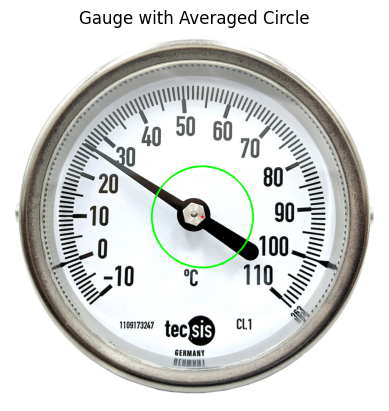

'/mnt/data/gauge_with_avg_circle.png'

In [4]:
# Draw the specific circle (center (532, 514), radius 140) on the image

# Reload the original image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Define center and radius based on the averaged values
avg_center = (532, 514)
avg_radius = 140

# Draw the outer circle
cv2.circle(image, avg_center, avg_radius, (0, 255, 0), 4)
# Draw the center of the circle
cv2.circle(image, avg_center, 2, (0, 0, 255), 3)

# Save the modified image to a file
output_avg_path = '/mnt/data/gauge_with_avg_circle.png'
cv2.imwrite(output_avg_path, image)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Gauge with Averaged Circle")
plt.axis("off")
plt.show()

output_avg_path


In [6]:
# Define the calibrate_gauge function as provided
def calibrate_gauge(gauge_number, file_type):
    img = cv2.imread('gauge-%s.%s' %(gauge_number, file_type))
    height, width = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #convert to gray

    # Detect circles with HoughCircles
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, np.array([]), 100, 50, int(height*0.35), int(height*0.48))

    # Average found circles for accuracy
    a, b, c = circles.shape
    x, y, r = avg_circles(circles, b)

    # Draw the detected circle and center
    cv2.circle(img, (x, y), r, (0, 0, 255), 3, cv2.LINE_AA)
    cv2.circle(img, (x, y), 2, (0, 255, 0), 3, cv2.LINE_AA)

    # Adding lines and labels to image (not saving output image here for testing purposes)
    separation = 10.0  # degrees
    interval = int(360 / separation)
    p1 = np.zeros((interval, 2))  # line start points
    p2 = np.zeros((interval, 2))  # line end points
    p_text = np.zeros((interval, 2))  # text label points

    for i in range(interval):
        for j in range(2):
            if j % 2 == 0:
                p1[i][j] = x + 0.9 * r * np.cos(separation * i * np.pi / 180)
            else:
                p1[i][j] = y + 0.9 * r * np.sin(separation * i * np.pi / 180)

    text_offset_x = 10
    text_offset_y = 5
    for i in range(interval):
        for j in range(2):
            if j % 2 == 0:
                p2[i][j] = x + r * np.cos(separation * i * np.pi / 180)
                p_text[i][j] = x - text_offset_x + 1.2 * r * np.cos((separation) * (i + 9) * np.pi / 180)
            else:
                p2[i][j] = y + r * np.sin(separation * i * np.pi / 180)
                p_text[i][j] = y + text_offset_y + 1.2 * r * np.sin((separation) * (i + 9) * np.pi / 180)

    # User input for calibration
    min_angle = 45  # lowest angle
    max_angle = 320  # highest angle
    min_value = 0  # minimum value
    max_value = 200  # maximum value
    units = "Temperature"

    return min_angle, max_angle, min_value, max_value, units, x, y, r

# Calibrate the gauge using the provided image
gauge_number = 'gauge'
file_type = 'png'

# Use the attached file for calibration
image_path = './gauge--10-110_1200x.png'
cv2.imwrite('gauge-%s.%s' %(gauge_number, file_type), cv2.imread(image_path))

# Call the calibrate_gauge function
calibration_results = calibrate_gauge(gauge_number, file_type)
calibration_results


(45, 320, 0, 200, 'Temperature', 512, 512, 402)

In [7]:
# Define the dist_2_pts function, which is needed in the provided code
def dist_2_pts(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Define the get_current_value function as provided
def get_current_value(img, min_angle, max_angle, min_value, max_value, x, y, r, gauge_number, file_type):
    gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    thresh = 175
    maxValue = 255
    th, dst2 = cv2.threshold(gray2, thresh, maxValue, cv2.THRESH_BINARY_INV)

    # Find lines using Hough Line Transform
    minLineLength = 10
    maxLineGap = 0
    lines = cv2.HoughLinesP(image=dst2, rho=3, theta=np.pi / 180, threshold=100, minLineLength=minLineLength, maxLineGap=maxLineGap)

    # Filter lines based on their distance from the center and the radius
    final_line_list = []
    diff1LowerBound = 0.15
    diff1UpperBound = 0.25
    diff2LowerBound = 0.5
    diff2UpperBound = 1.0

    for i in range(0, len(lines)):
        for x1, y1, x2, y2 in lines[i]:
            diff1 = dist_2_pts(x, y, x1, y1)
            diff2 = dist_2_pts(x, y, x2, y2)

            if diff1 > diff2:
                temp = diff1
                diff1 = diff2
                diff2 = temp

            if ((diff1 < diff1UpperBound * r and diff1 > diff1LowerBound * r and diff2 < diff2UpperBound * r) and diff2 > diff2LowerBound * r):
                final_line_list.append([x1, y1, x2, y2])

    # Assume the first line is the best one
    x1 = final_line_list[0][0]
    y1 = final_line_list[0][1]
    x2 = final_line_list[0][2]
    y2 = final_line_list[0][3]

    # Find the farthest point from the center
    dist_pt_0 = dist_2_pts(x, y, x1, y1)
    dist_pt_1 = dist_2_pts(x, y, x2, y2)

    if dist_pt_0 > dist_pt_1:
        x_angle = x1 - x
        y_angle = y - y1
    else:
        x_angle = x2 - x
        y_angle = y - y2

    # Calculate the angle using arc tangent
    res = np.arctan(np.divide(float(y_angle), float(x_angle)))
    res = np.rad2deg(res)

    if x_angle > 0 and y_angle > 0:  # Quadrant I
        final_angle = 270 - res
    elif x_angle < 0 and y_angle > 0:  # Quadrant II
        final_angle = 90 - res
    elif x_angle < 0 and y_angle < 0:  # Quadrant III
        final_angle = 90 - res
    elif x_angle > 0 and y_angle < 0:  # Quadrant IV
        final_angle = 270 - res

    # Convert the angle to a value based on the gauge range
    old_min = float(min_angle)
    old_max = float(max_angle)
    new_min = float(min_value)
    new_max = float(max_value)

    old_range = (old_max - old_min)
    new_range = (new_max - new_min)
    new_value = (((final_angle - old_min) * new_range) / old_range) + new_min

    return new_value

# Load the image
img = cv2.imread(image_path)

# Use the calibration results from the previous step
min_angle, max_angle, min_value, max_value, units, x, y, r = calibration_results

# Call the get_current_value function
gauge_number = 'gauge'
file_type = 'png'
current_value = get_current_value(img, min_angle, max_angle, min_value, max_value, x, y, r, gauge_number, file_type)
current_value


IndexError: list index out of range

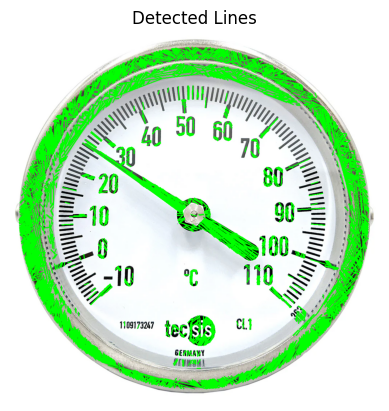

In [8]:
# First, let's visualize the lines detected by HoughLinesP to understand where the problem might be.

# Apply the same thresholding as before
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = 175
maxValue = 255
_, dst2 = cv2.threshold(gray_img, thresh, maxValue, cv2.THRESH_BINARY_INV)

# Detect lines using HoughLinesP
minLineLength = 10
maxLineGap = 0
lines = cv2.HoughLinesP(image=dst2, rho=3, theta=np.pi / 180, threshold=100, minLineLength=minLineLength, maxLineGap=maxLineGap)

# Draw the detected lines on the image for visualization
line_img = img.copy()
if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
else:
    print("No lines detected.")

# Show the image with detected lines
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Lines")
plt.axis("off")
plt.show()

# Once the lines are visualized, we can try running the get_current_value() function again if the lines look reasonable.


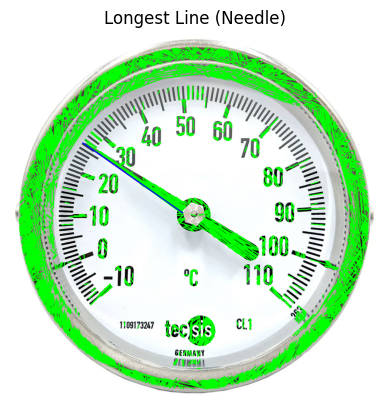

56.82459294465391

In [11]:
# Modify to find the longest line and use it as the needle
def get_longest_line(lines):
    longest_line = None
    max_length = 0

    for line in lines:
        for x1, y1, x2, y2 in line:
            length = dist_2_pts(x1, y1, x2, y2)
            if length > max_length:
                max_length = length
                longest_line = [x1, y1, x2, y2]

    return longest_line

# Find the longest line
longest_line = get_longest_line(lines)

# Visualize the longest line on the image
if longest_line is not None:
    x1, y1, x2, y2 = longest_line
    cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw the longest line in blue
else:
    print("No longest line found.")

# Show the image with the longest line highlighted
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title("Longest Line (Needle)")
plt.axis("off")
plt.show()

# Now we can use this line as the needle in the get_current_value() function.
# Now use the longest line to calculate the current gauge value
if longest_line is not None:
    current_value = get_current_value_with_longest_line(img, min_angle, max_angle, min_value, max_value, x, y, r, longest_line)
    current_value
else:
    current_value = "No valid needle line detected."

current_value
